## Table of Contents


*   Introduction
*   Importing important libraries
*   Importing the data
*   Exploring the data:

   > Q1: Which genres are most popular from year to year?
   
   > Q2: let's calculate profits:
   
   > Q3: Which genres returns the most profits?
   
   > Q4: Are movies with high profits are the same with high reveneu?
   
   > Q5: let's get an info about the average runtime of movies:
   
   > Q6: let's see if there is a realtion between profits and releasing year:
   
   > Q1: Which genres are most popular from year to year?


*   Conclusions








# **Introduction**
##**Project: TMDb movie data**
## Investigate a Dataset

#**Importing important libraries**

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 
import numpy as np 
import plotly.express as px

#**Importing the data**

In [347]:
df= pd.read_csv('tmdb-movies.csv')

#**Exploring the data**
### General Properties

In [348]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [349]:
df.shape

(10866, 21)

In [350]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#**Data cleaning**
### Data Cleaning

In [351]:
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [352]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

There are some columns which don't have the suitable type so we have to define each column type in a dictionary and plug this dict into dtype function and we have a date column which is release_date which should be pasred using parse_dates function

In [353]:
typo= {"original_title": "str","cast":"str","director": "str", "tagline": "str", "keywords": "str", "overview": "str", "geners": "str"}
date_typo = ['release_date']
df_new= pd.read_csv('tmdb-movies.csv', parse_dates= date_typo, dtype=typo)

Time to choose which columns we should keep and which ones should be dropped.

In [354]:
#creating a list of columb to be deleted
del_col=[ 'id', 'imdb_id','cast', 'homepage', 'keywords', 'overview', 'production_companies','budget_adj', 'revenue_adj']
#del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
#deleting the columns
df_new= df_new.drop(del_col,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Let's define the shape of our dataset:

In [355]:
rw, cl = df_new.shape
print('There are {} movies and {} attributes in it.'.format(rw-1, cl))

There are 10865 movies and 12 attributes in it.


The duplicate rows inside your data could lead to wrong interpretation so we have to make sure that our data is free from duplicates.

Time to remove duplicates from our data:

In [356]:
df_new.drop_duplicates(keep ='first', inplace=True)

Time to check the shape of our the data to know the duplication effect

In [357]:
rw, cl = df_new.shape
print('After deleting duplicates, there are now {} movies and {} attributes in it.'.format(rw-1, cl))

After deleting duplicates, there are now 10864 movies and 12 attributes in it.


NA values will distribute our calculations functions so we have to make sure that our data is free from NA values before making our analysis 

let's show the number of NA values inside our data in each column

In [358]:
df_new.isna().sum()

popularity           0
budget               0
revenue              0
original_title       0
director            44
tagline           2824
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

It is impossible to have a movie with a budget that equals zero so it is anonymous data.

And achieving revenue of zero is impossible too.

The best way to drop those rows is to replace the value with NA value and that will be easy to drop.na function.

In [359]:
# creating a seperate list of revenue and budget column
zerov_rows=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df_new[zerov_rows] = df_new[zerov_rows].replace(0, np.NAN)

let's check if our trick played its role and turned zero values into NA values 

In [360]:
df_new.isna().sum()

popularity           0
budget            5696
revenue           6016
original_title       0
director            44
tagline           2824
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

well done, time to remove NA values 

In [361]:
#Removing all the row which has NaN value in temp_list 
na_rows=['budget', 'revenue','director','tagline','genres']
df_new.dropna(subset = na_rows, inplace = True)

let's check the shape of your data now after cleaning it.

In [362]:
rw, cl = df_new.shape
print('After cleaning our data, there are now {} movies and {} attributes in it.'.format(rw-1, cl))

After cleaning our data, there are now 3573 movies and 12 attributes in it.


#**EDA.Exploratory data analysis:**

In [363]:
df_new.head()

,popularity,budget,revenue,original_title,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


  > ###  Q1: Which genres are most popular from year to year?

In [393]:
def dfrelation(x,y):
  dfrelt = pd.DataFrame(df_new.groupby(x)[y].sum())
  dfrelt.sort_values(y, ascending=False, inplace=True)
  fig= dfrelt.head(6).plot(kind='bar')
  plt.xticks(rotation= 45)
  plt.xlabel(str.title(x), size=15)
  plt.ylabel(str.title(y), size=15)
  plt.title('{} and {}'.format(str.title(x),str.title(y), size=20))

  return dfrelt


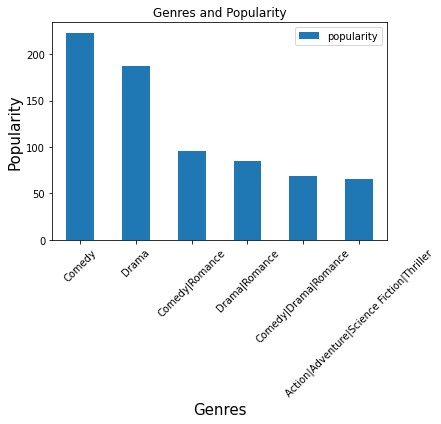

In [394]:
genres_popularity = dfrelation('genres','popularity')

 > ### We have to calcualte the profit of each movie, 
 > ### Q2: let's calculate profits:


We can cacluate the profits by substracting the budget from revenue 

In [395]:
df_new['Profit']= df_new['revenue'] - df_new['budget']

 > ### Q3: Which genres returns the most profits?
 > #### let's make a hypothy that the result will be like the last results, don't rush until we make sure

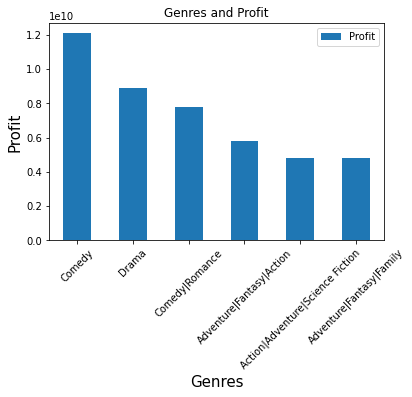

In [396]:
genres_profits= dfrelation('genres','Profit')

In [397]:
print("The highest profits achieved by {} and the lowest profits achieved by {}".format(df_new.groupby('genres')['Profit'].sum().idxmax(),df_new.groupby('genres')['Profit'].sum().idxmin()))

The highest profits achieved by Comedy and the lowest profits achieved by Adventure|Fantasy|Action|Western|Thriller


  > ### **Q4**: Are movies with high profits are the same with high reveneu?

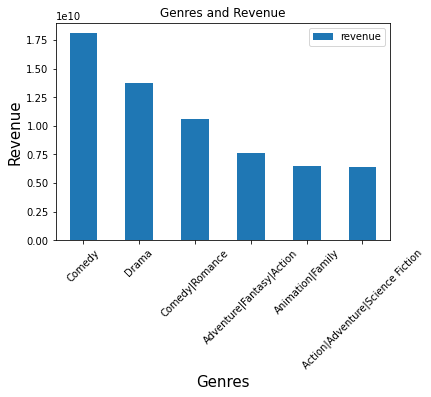

In [398]:
genres_revenue= dfrelation('genres','revenue')


Well, it is not completly true

we can notice differences in movies order 

In [372]:
print("The highest revenue acquired by {} and the lowest revenue acquired by {}".format(df_new.groupby('genres')['revenue'].sum().idxmax(),df_new.groupby('genres')['revenue'].sum().idxmin()))

The highest revenue acquired by Comedy and the lowest revenue acquired by Adventure|Action|Comedy|Science Fiction|Music


 > ### Q5: let's get an info about the average runtime of movies:

In [373]:
df_new.head(1)

,popularity,budget,revenue,original_title,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,Profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.363529e+09


In [374]:
print ("The average runtime of movies om TMDB is {} minutes".format(round(df_new['runtime'].mean(),2)))

The average runtime of movies om TMDB is 109.11 minutes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



[Text(0, 0.5, ' '), Text(0.5, 0, 'Time (minutes)')]

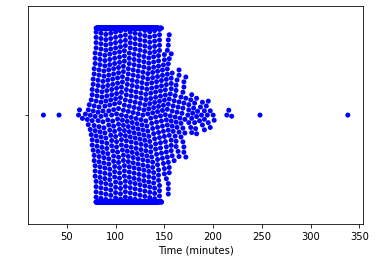

In [375]:
fig= sns.swarmplot(df_new["runtime"], color = 'blue')
fig.set(xlabel="Time (minutes)",ylabel= " ")


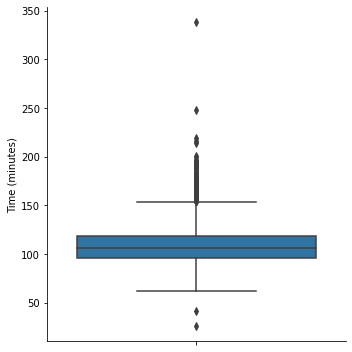

In [376]:
g1= sns.catplot(data=df_new, y="runtime", kind='box')
g1.set(xlabel="",ylabel= "Time (minutes)")

In [377]:
print("The longest movie on TMBD is {} minutes and the shortest movie on TMBD is {} minutes".format(df_new["runtime"].max(),df_new.runtime.min()))

The longest movie on TMBD is 338 minutes and the shortest movie on TMBD is 26 minutes


 >  ### Q6: let's see if there is a realtion between profits and releasing year:


Text(0.5, 1.0, 'Profits and Releasing Year')

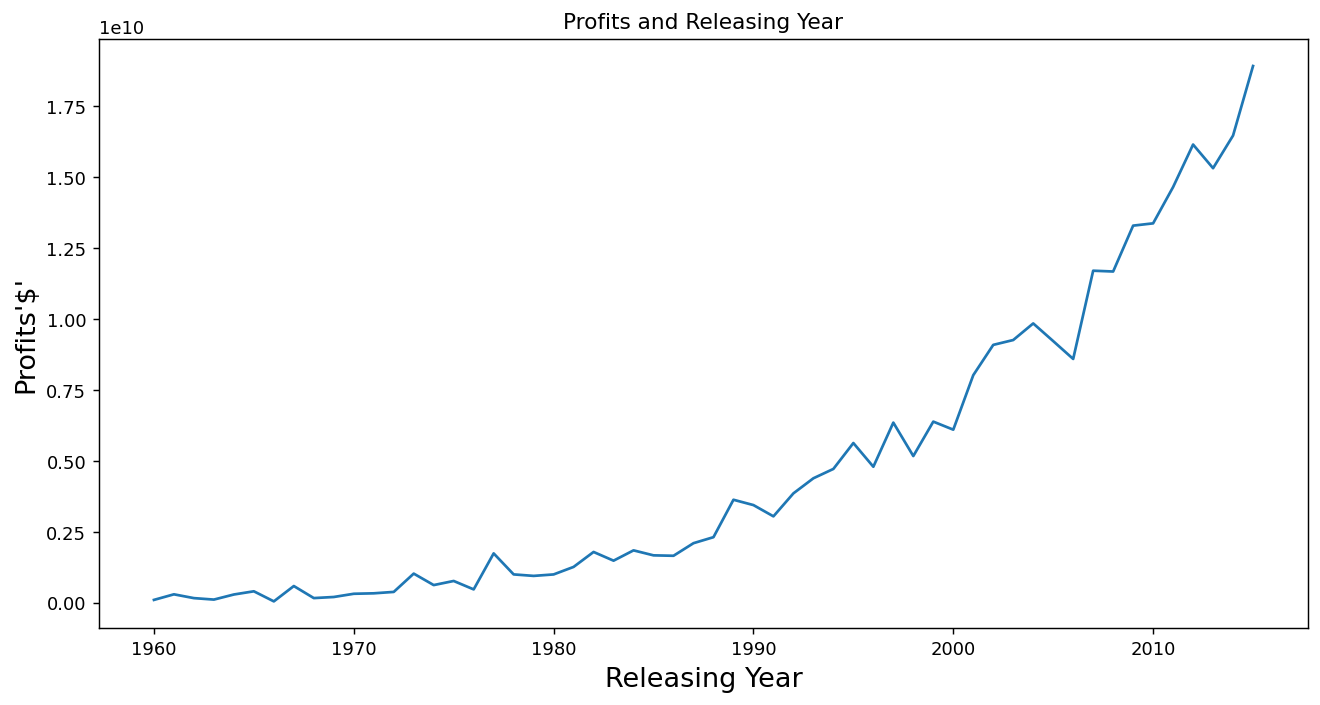

In [378]:
plt.figure(figsize=(12,6), dpi = 130)
df_new.groupby('release_year')['Profit'].sum().plot(kind='line')
plt.xlabel('Releasing Year', size=15)
plt.ylabel("Profits'$'",size=15)
plt.title('Profits and Releasing Year')

In [379]:
print("The highest profits achieved in {} and the lowest profits achieved in {}".format(df_new.groupby('release_year')['Profit'].sum().idxmax(),df_new.groupby('release_year')['Profit'].sum().idxmin()))

The highest profits achieved in 2015 and the lowest profits achieved in 1966


<a id='conclusions'></a>
## Conclusions


*   The most sucessful movie genre is: Action, Adventure, Thriller, Comedy Drama.
*   The average runtime for a suceesful movie is 113 minutes.
*   One of those actors list [Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron Diaz]cause a noticeable increase in revenue.
*   The average popularity of movies is 0.64 and the average vote is 5.97


<a id='conclusions'></a>
## Conclusions 

Limitations: 

*   The data collected in that dataset was about movies that have a runtime between 338 and 26 minutes with a 1.462570e+07 budget and I don't know the currency because it is highly expected for this data to be collected from different countries.

*   Besides I am not completely sure that the data provided to us is completely correct and up-to-date. 

In [380]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255